In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('./emotions.csv')

In [4]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


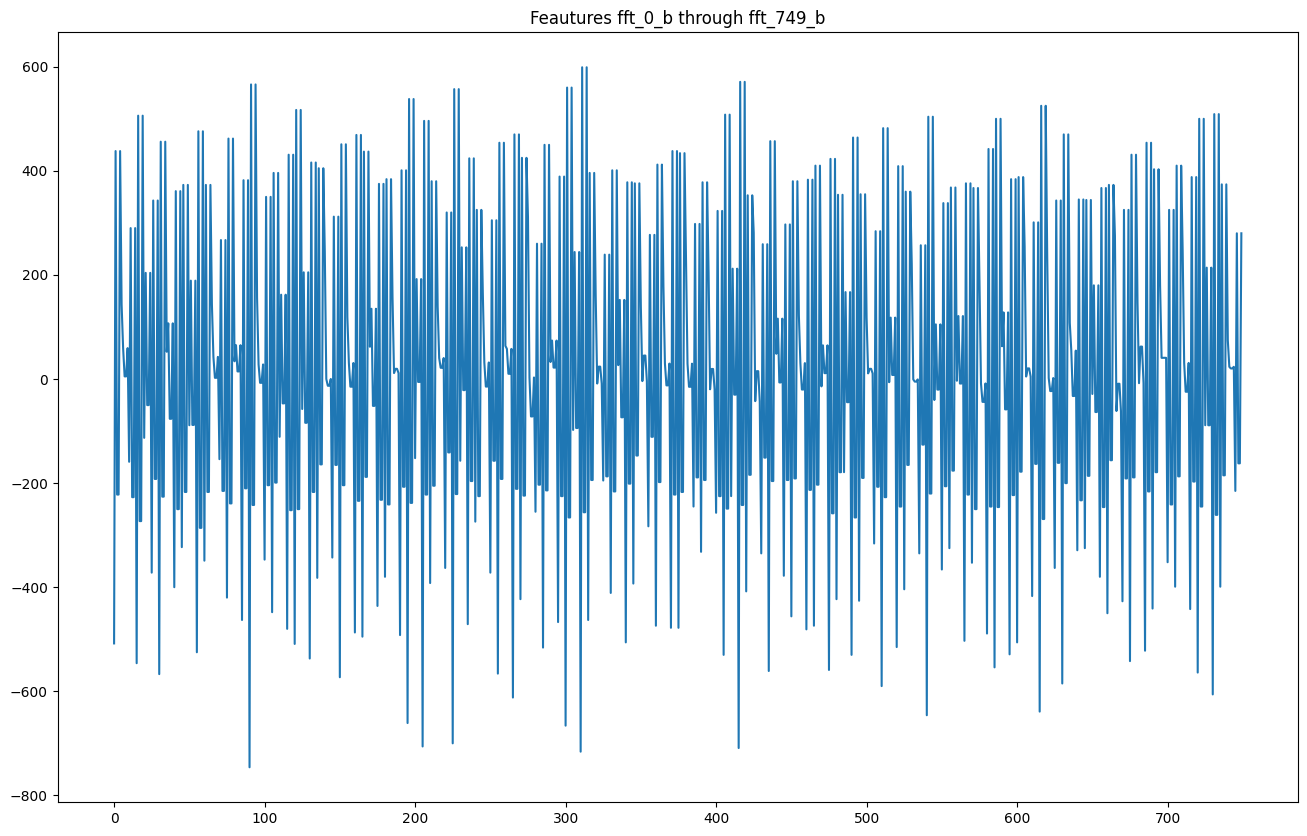

In [5]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [6]:
data['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [7]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [8]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

C:\Users\madhu\AppData\Local\Temp\ipykernel_7384\3624764054.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [10]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


In [11]:
X_test

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
1676,13.00,28.7,-264.00,7.60,27.0,-2.1500,2.7600,-3.950,0.233,-1.210,...,6.27,152.00,-93.6,-93.6,152.00,56.20,103.00,-64.20,-64.20,103.00
1074,12.30,29.9,-217.00,9.72,30.0,15.4000,4.4100,5.750,10.100,-3.010,...,-139.00,213.00,-118.0,-118.0,213.00,-4.39,75.60,59.00,59.00,75.60
1451,13.40,23.1,22.70,6.66,25.2,-5.4700,2.4500,1.780,-7.650,-6.520,...,75.50,-10.70,-25.6,-25.6,-10.70,175.00,6.03,8.52,8.52,6.03
1134,26.60,30.8,27.10,25.10,25.2,1.5200,0.3940,-2.390,1.130,-1.070,...,138.00,25.80,12.8,12.8,25.80,125.00,3.00,26.10,26.10,3.00
912,0.65,28.4,-570.00,11.50,25.4,2.1700,1.1200,-16.100,-2.340,-3.810,...,-881.00,612.00,-310.0,-310.0,612.00,-607.00,534.00,-235.00,-235.00,534.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,9.43,30.0,23.10,8.21,21.0,-0.0572,2.7400,-0.468,-1.170,-5.790,...,81.80,-17.90,-66.9,-66.9,-17.90,65.20,11.30,2.53,2.53,11.30
1016,15.00,26.8,-131.00,13.40,27.4,0.1760,-1.9300,-24.500,-3.690,-3.500,...,-487.00,446.00,-206.0,-206.0,446.00,87.90,106.00,-129.00,-129.00,106.00
1209,-10.20,33.7,-662.00,11.40,24.0,-13.2000,-0.7910,17.400,9.000,0.753,...,-670.00,513.00,-267.0,-267.0,513.00,-642.00,608.00,-291.00,-291.00,608.00
36,9.98,29.3,65.50,17.30,25.8,4.5500,-0.0105,-142.000,0.867,4.400,...,111.00,-54.60,64.1,64.1,-54.60,73.10,41.50,-107.00,-107.00,41.50


In [12]:
y_train

993     2
1851    2
1253    0
1228    1
1461    1
       ..
1593    2
1147    1
1766    0
1122    1
1346    0
Name: label, Length: 1492, dtype: int64

In [13]:
y_test

1676    0
1074    0
1451    2
1134    1
912     0
       ..
316     2
1016    0
1209    0
36      2
1467    1
Name: label, Length: 640, dtype: int64

In [14]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 13s 241ms/step - loss: 27.8411 - accuracy: 0.7795 - val_loss: 16.6123 - val_accuracy: 0.8729
Epoch 2/50
38/38 [==============================] - 9s 231ms/step - loss: 5.9035 - accuracy: 0.9061 - val_loss: 6.9614 - val_accuracy: 0.9097
Epoch 3/50
38/38 [==============================] - 9s 234ms/step - loss: 2.3836 - accuracy: 0.9413 - val_loss: 4.1193 - val_accuracy: 0.9298
Epoch 4/50
38/38 [==============================] - 14s 370ms/step - loss: 7.8971 - accuracy: 0.9195 - val_loss: 4.9676 - val_accuracy: 0.9130
Epoch 5/50
38/38 [==============================] - 14s 380ms/step - loss: 1.0413 - accuracy: 0.9816 - val_loss: 1.9170 - val_accuracy: 0.9532
Epoch 6/50
38/38 [==============================] - 9s 247ms/step - loss: 0.1187 - accuracy: 0.9950 - val_loss: 8.2222 - val_accuracy: 0.9164
Epoch 7/50
38/38 [==============================] - 11s 297ms/step - loss: 0.9541 - accuracy: 0.9782 - val_loss: 2.5017 - val_accuracy: 0.9532


In [16]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 95.625%


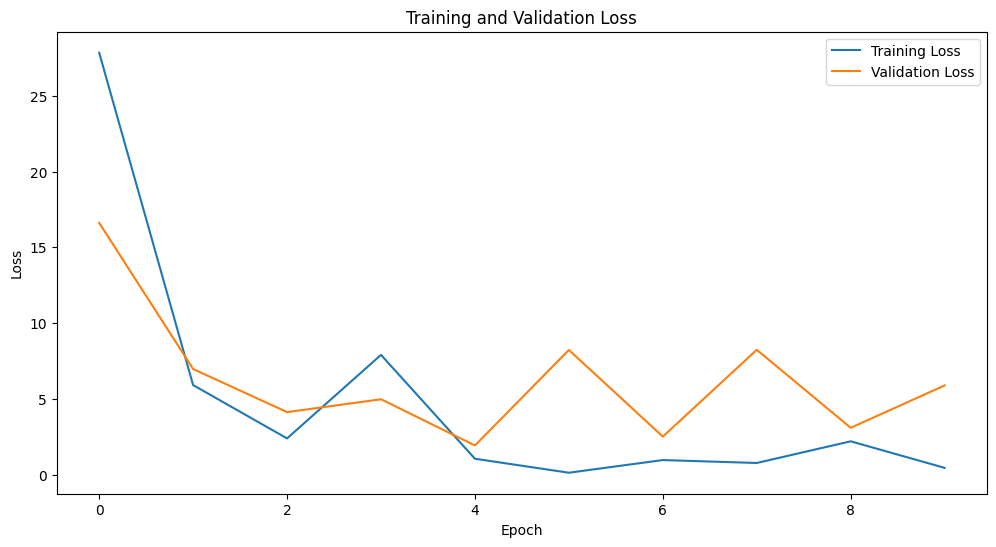

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


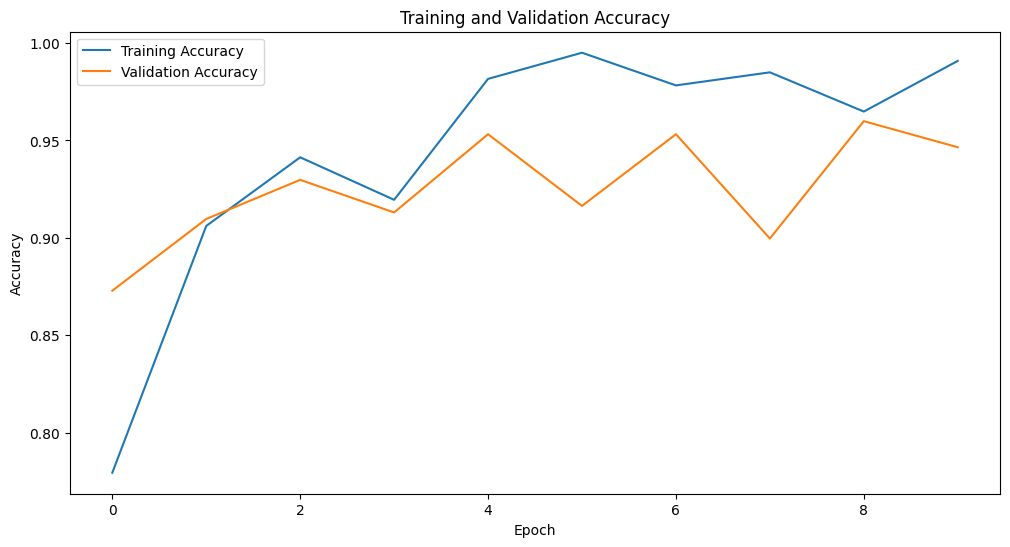

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


20/20 [==============================] - 2s 72ms/step


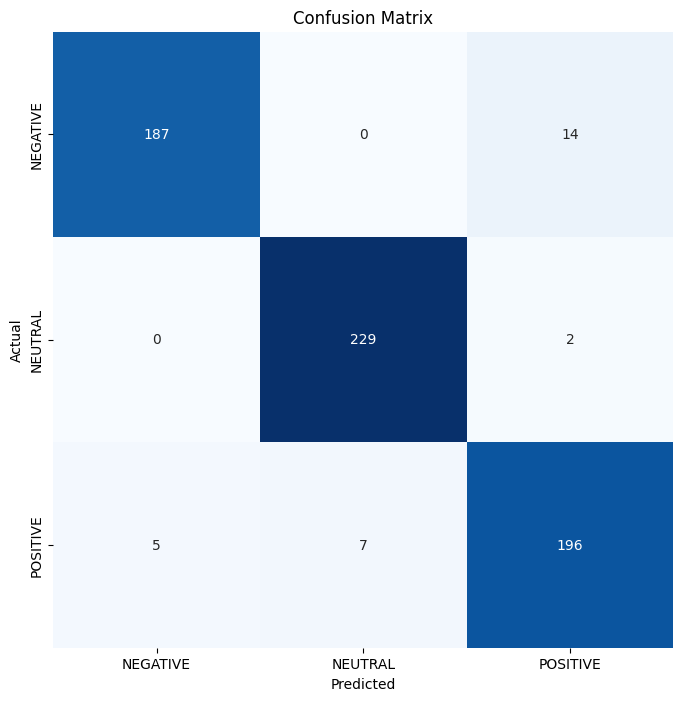

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.93      0.95       201
     NEUTRAL       0.97      0.99      0.98       231
    POSITIVE       0.92      0.94      0.93       208

    accuracy                           0.96       640
   macro avg       0.96      0.95      0.96       640
weighted avg       0.96      0.96      0.96       640



In [19]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model.save('emotion_detection_model.h5')